## 1. Load and Inspect the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's saved as a CSV or similar)
# For demonstration, I'll create a DataFrame from the given table
data = {
    'A': ['Transactional']*50,  # Simplified for example
    'B': list(range(2487, 2537)),  # Example numeric range
    'C': ['Bethold ' + str(i) for i in range(34323, 34373)],  # Example text
    'D': ['Accounting ' + str(i) for i in range(3507, 3557)]  # Example text
}
df = pd.DataFrame(data)

# Display first few rows
print(df.head())
print(f"Dataset shape: {df.shape}")
print(df.info())

               A     B              C                D
0  Transactional  2487  Bethold 34323  Accounting 3507
1  Transactional  2488  Bethold 34324  Accounting 3508
2  Transactional  2489  Bethold 34325  Accounting 3509
3  Transactional  2490  Bethold 34326  Accounting 3510
4  Transactional  2491  Bethold 34327  Accounting 3511
Dataset shape: (50, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       50 non-null     object
 1   B       50 non-null     int64 
 2   C       50 non-null     object
 3   D       50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
None


## 2.Data Cleaning

In [2]:
df.columns = ['Transaction_Type', 'Transaction_ID', 'Customer_Code', 'Account_Code']

## 3. Summary Statistics

In [3]:
print(df.describe())

       Transaction_ID
count        50.00000
mean       2511.50000
std          14.57738
min        2487.00000
25%        2499.25000
50%        2511.50000
75%        2523.75000
max        2536.00000


## 4.  Distribution of Numerical Features

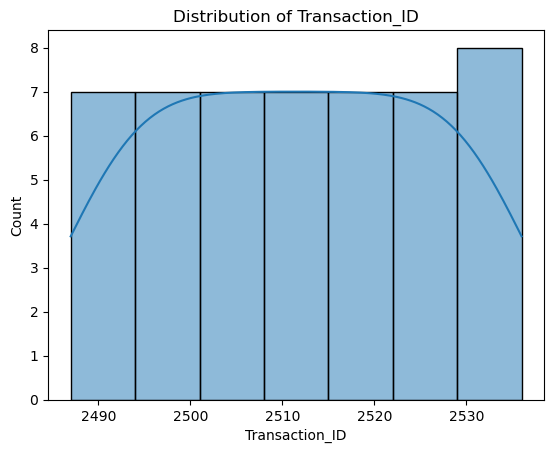

In [4]:
sns.histplot(df['Transaction_ID'], kde=True)
plt.title('Distribution of Transaction_ID')
plt.show()

## 5. Distribution of Categorical Features

In [5]:
for col in ['Transaction_Type', 'Customer_Code', 'Account_Code']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for Transaction_Type:
Transaction_Type
Transactional    50
Name: count, dtype: int64

Value counts for Customer_Code:
Customer_Code
Bethold 34323    1
Bethold 34324    1
Bethold 34325    1
Bethold 34326    1
Bethold 34327    1
Bethold 34328    1
Bethold 34329    1
Bethold 34330    1
Bethold 34331    1
Bethold 34332    1
Bethold 34333    1
Bethold 34334    1
Bethold 34335    1
Bethold 34336    1
Bethold 34337    1
Bethold 34338    1
Bethold 34339    1
Bethold 34340    1
Bethold 34341    1
Bethold 34342    1
Bethold 34343    1
Bethold 34344    1
Bethold 34345    1
Bethold 34346    1
Bethold 34347    1
Bethold 34348    1
Bethold 34349    1
Bethold 34350    1
Bethold 34351    1
Bethold 34352    1
Bethold 34353    1
Bethold 34354    1
Bethold 34355    1
Bethold 34356    1
Bethold 34357    1
Bethold 34358    1
Bethold 34359    1
Bethold 34360    1
Bethold 34361    1
Bethold 34362    1
Bethold 34363    1
Bethold 34364    1
Bethold 34365    1
Bethold 34366    1
Bethold 34367    1


## 6. Correlation Analysis

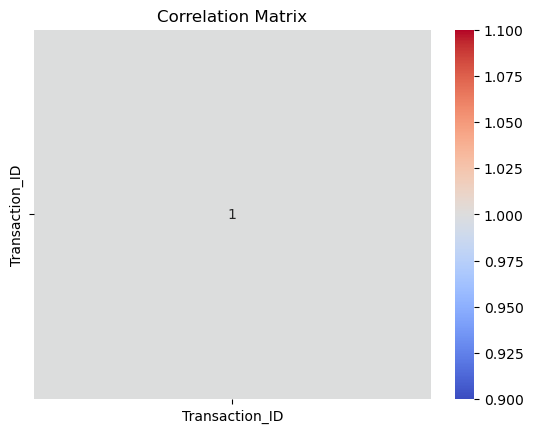

In [6]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 7. Missing Values Identification

In [7]:
print(df.isnull().sum())

Transaction_Type    0
Transaction_ID      0
Customer_Code       0
Account_Code        0
dtype: int64


## 8. Outlier Detection

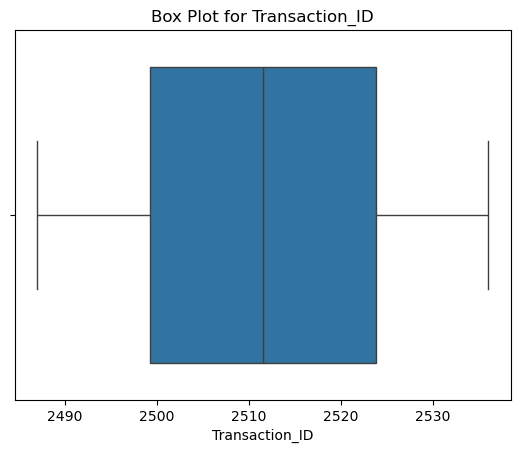

In [8]:
sns.boxplot(x=df['Transaction_ID'])
plt.title('Box Plot for Transaction_ID')
plt.show()

## 9. Top 3–5 Insights Summary

Based on the EDA, summarize key findings. For example:

Data Structure: The dataset contains 4 columns, mostly categorical. Only one column (Transaction_ID) is numeric.

No Missing Values: The dataset appears complete with no null entries.

Uniform Distribution: Transaction_ID values are uniformly distributed without skewness or outliers.

High Cardinality: Categorical columns like Customer_Code and Account_Code have many unique values, which may require encoding for modeling.

Single Transaction Type: All rows have the same Transaction_Type ('Transactional'), offering no predictive variability.


## 10. Recommendations for Feature Engineering
Consider encoding categorical columns (e.g., one-hot or label encoding).

If more data is available, create features like Transaction_Count per customer.

Normalize Transaction_ID if needed for modeling.

